<a href="https://colab.research.google.com/github/delToros/Data_science_earnings_prediction/blob/main/Determinants_of_Earnings_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')

In [5]:
data_description = pd.read_csv('NLSY97_Variable_Names_and_Descriptions.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [6]:
data_description

,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"
2,NaN,NaN,NaN
3,Ethnicity:,NaN,NaN
4,ETHBLACK,D,Black
...,...,...,...
117,URBAN,D,Living in an urban area
118,REGNE,D,Census region North east
119,REGNC,D,Census region North central
120,REGW,D,Census region West


In [7]:
data_description[data_description['Personal variables'] == 'AGEMBTH']

,Personal variables,Variable Type,Description
56,AGEMBTH,C,Age of mother at respondent’s birth


In [8]:
data_description[data_description['Personal variables'] == 'HHINC97'].Description.values[0]

'Gross household income, $, in year prior to 1997 interview'

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [10]:
df_data.shape

(2000, 96)

In [11]:
df_data.isna().values.any()

True

In [12]:
df_data.duplicated().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [13]:
df_data = df_data.drop_duplicates()

In [14]:
df_data.shape

(1487, 96)

## Descriptive Statistics

In [15]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

In [16]:
# earn = sns.displot(
#     data = df_data,
#     x = 'EARNINGS',
#     kind = 'kde',
#     aspect = 2,
#     # kde=True
# )

# earn.set_axis_labels('Current hourly earnings in $')

Code to create graph for every column

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


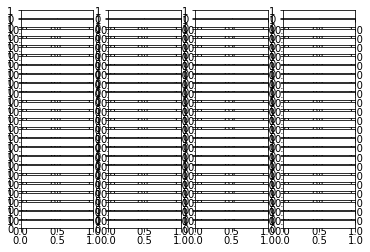

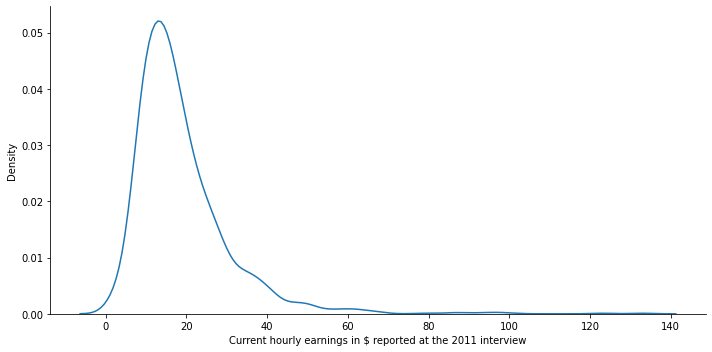

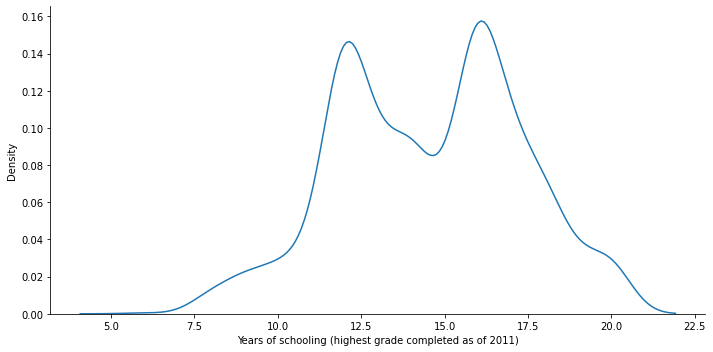

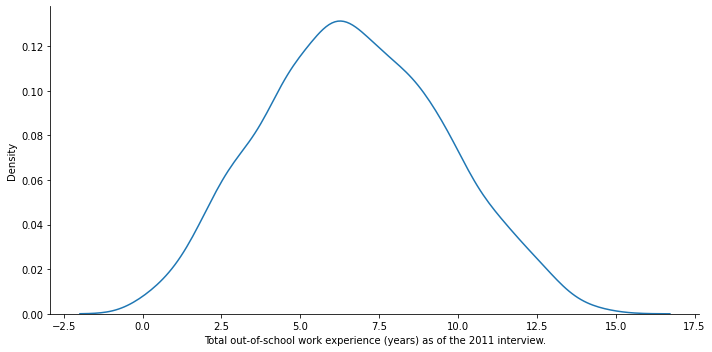

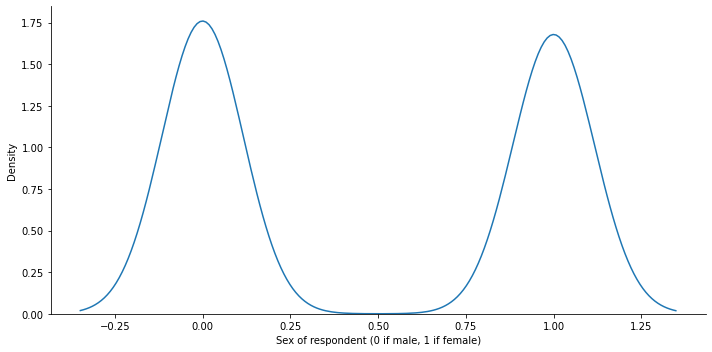

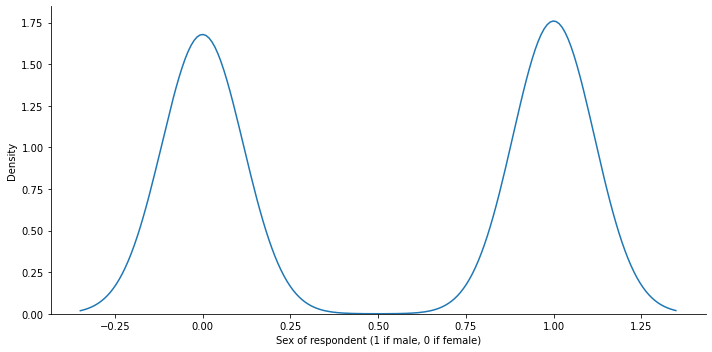

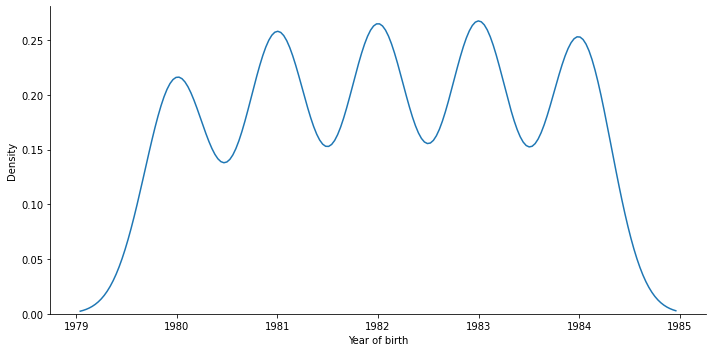

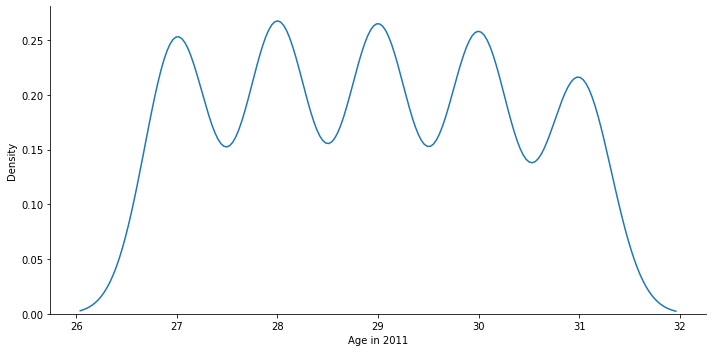

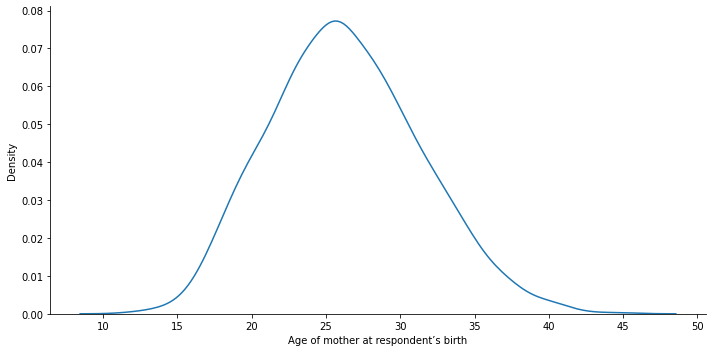

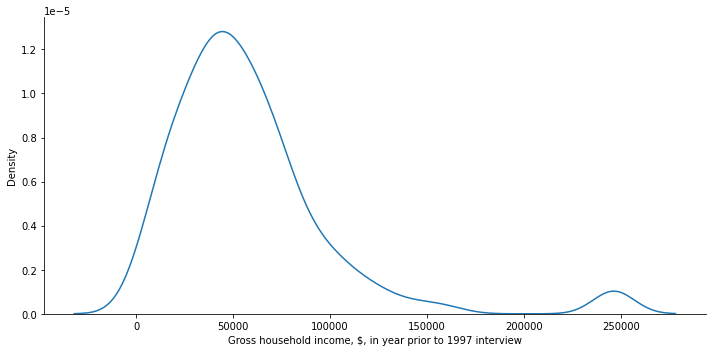

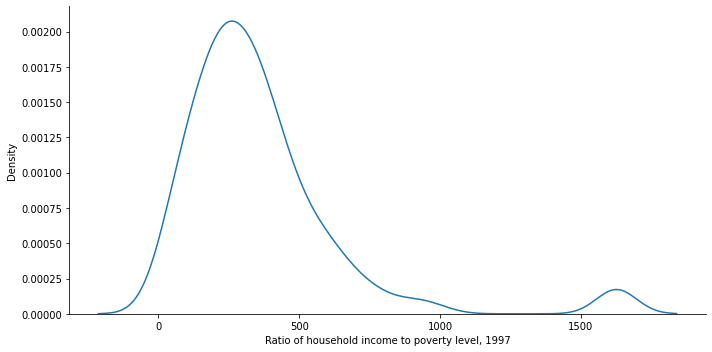

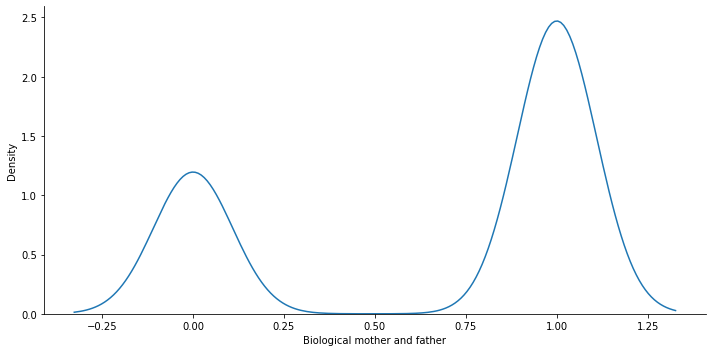

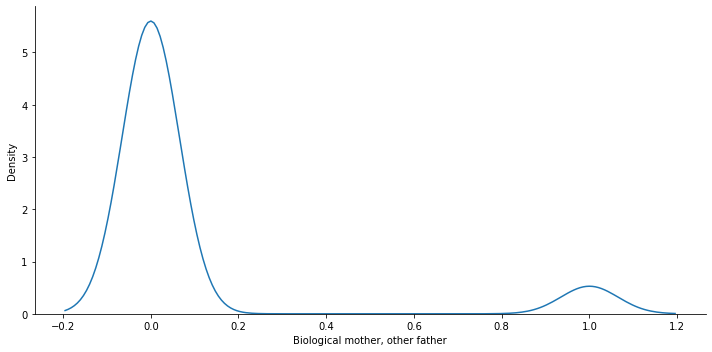

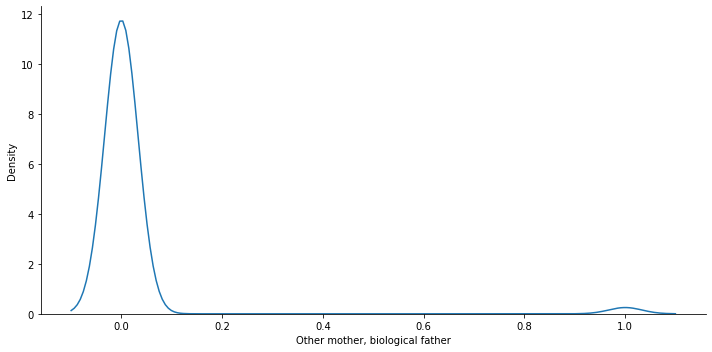

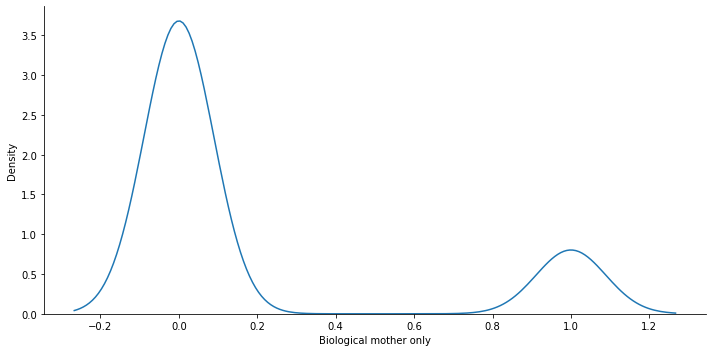

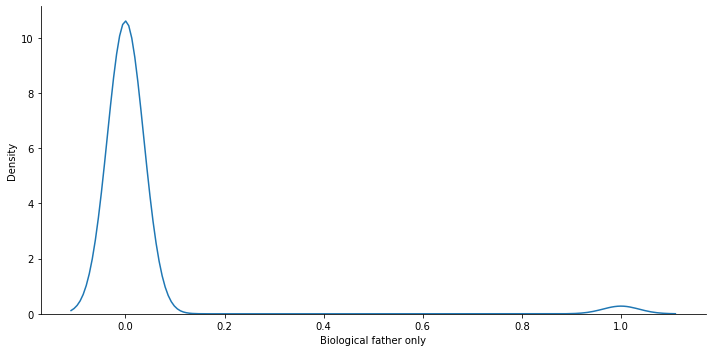

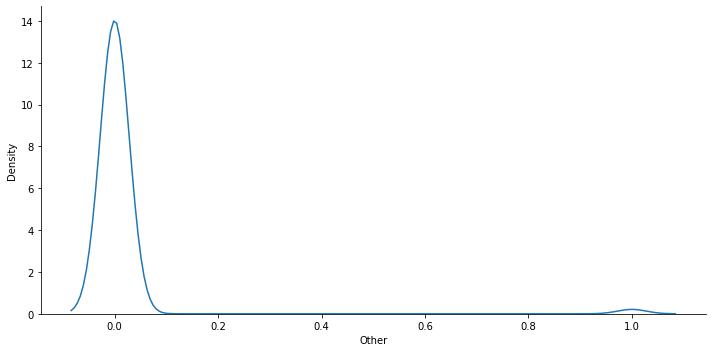

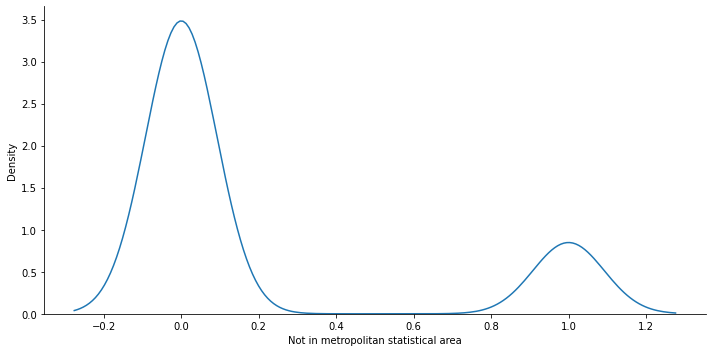

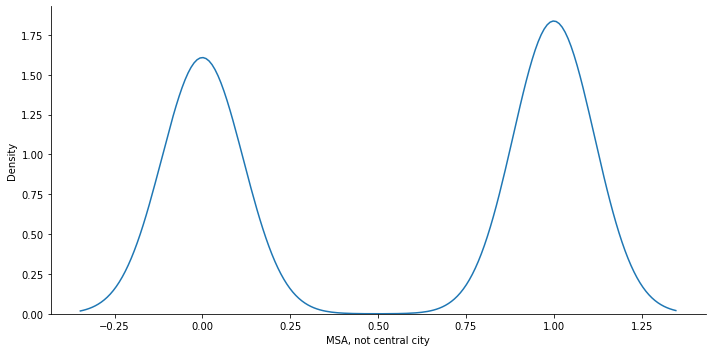

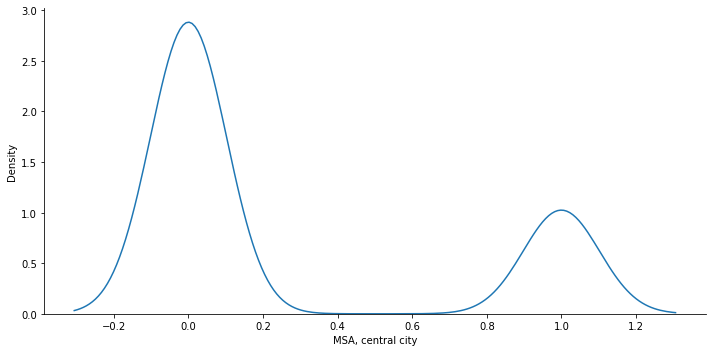

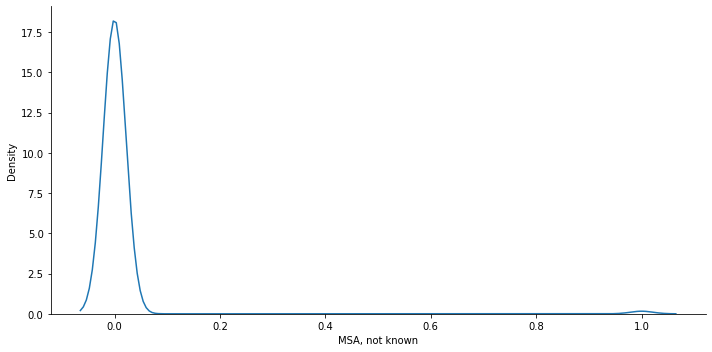

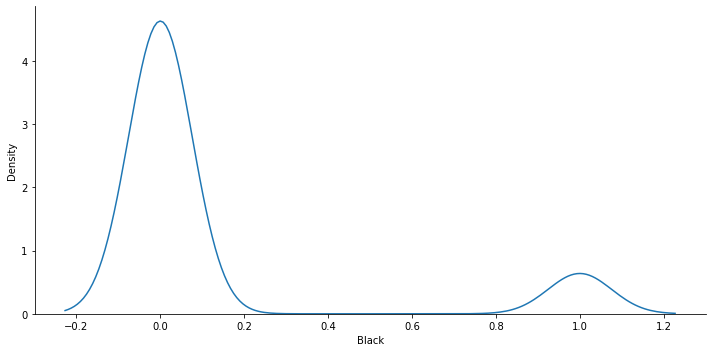

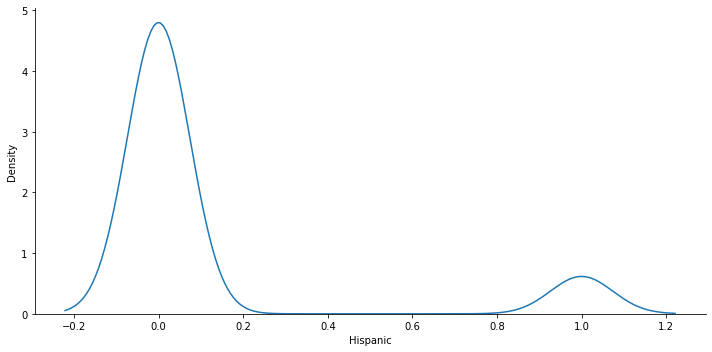

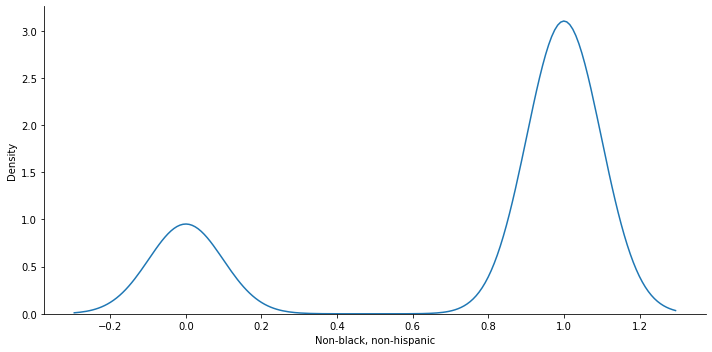

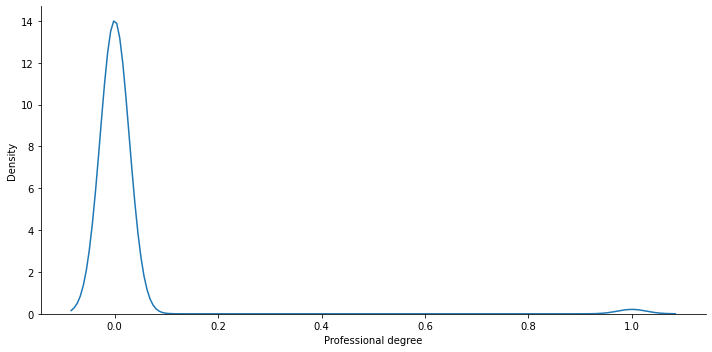

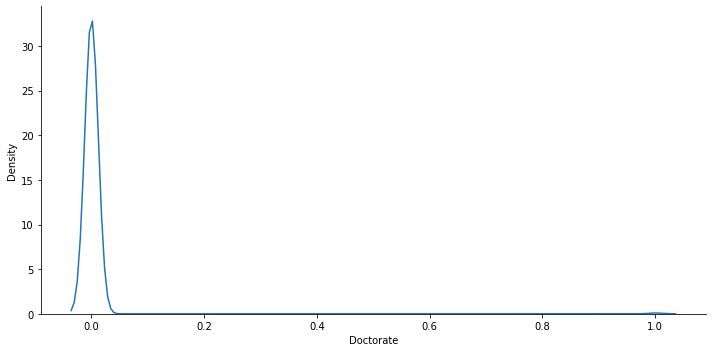

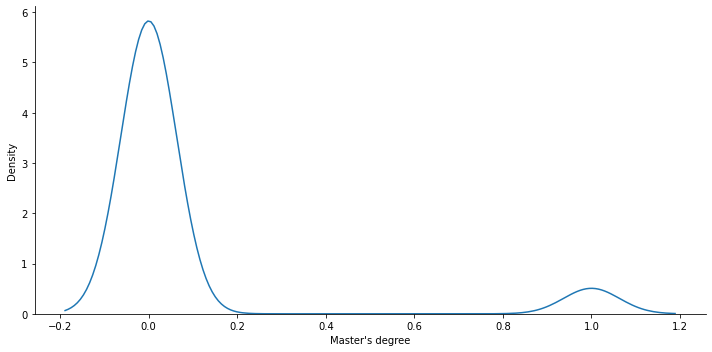

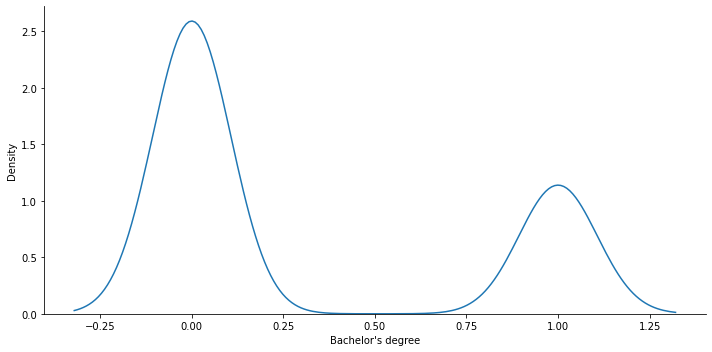

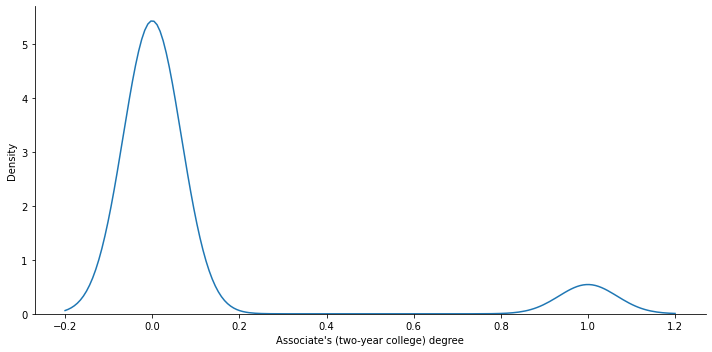

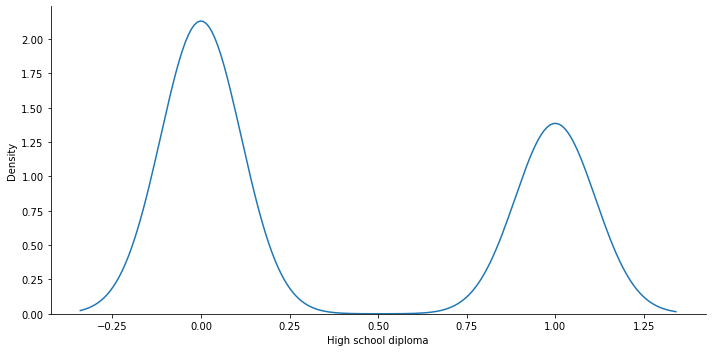

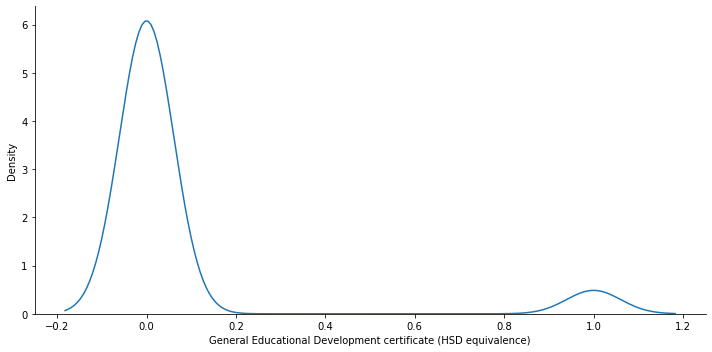

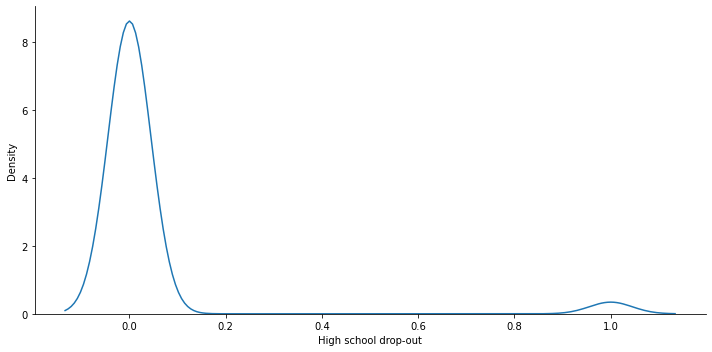

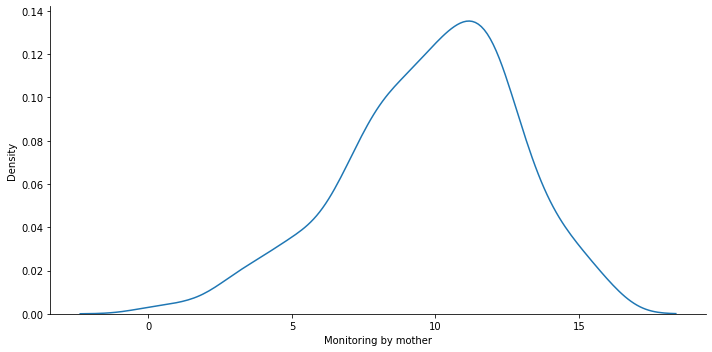

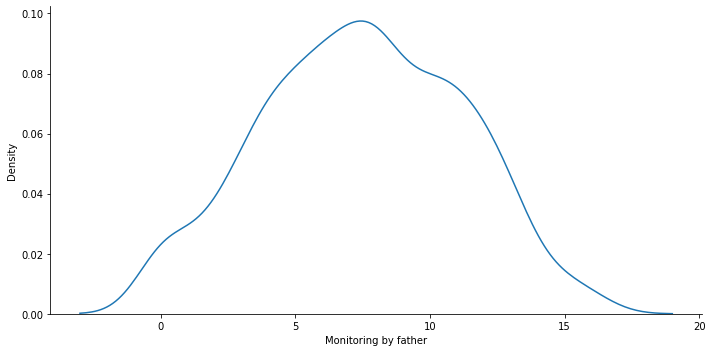

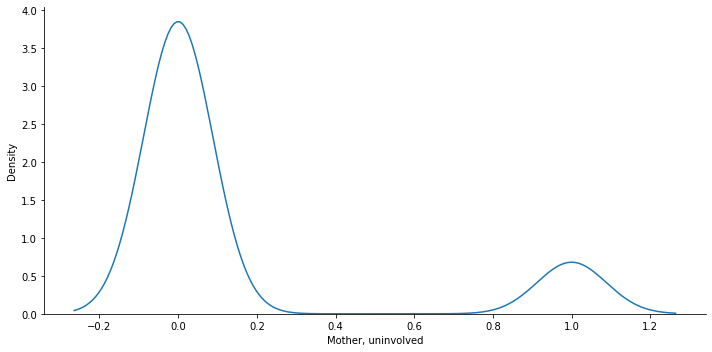

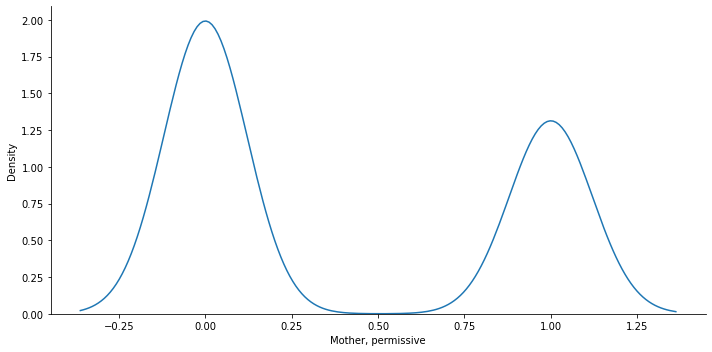

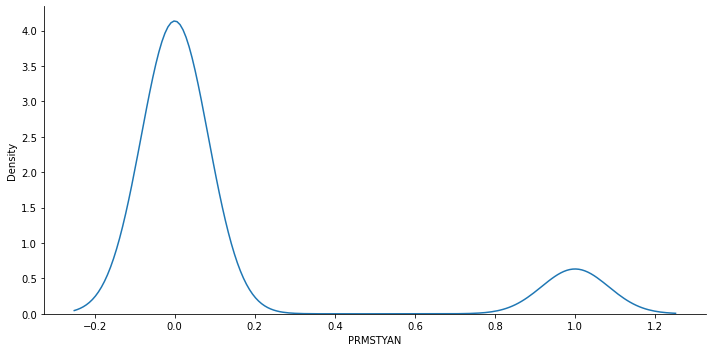

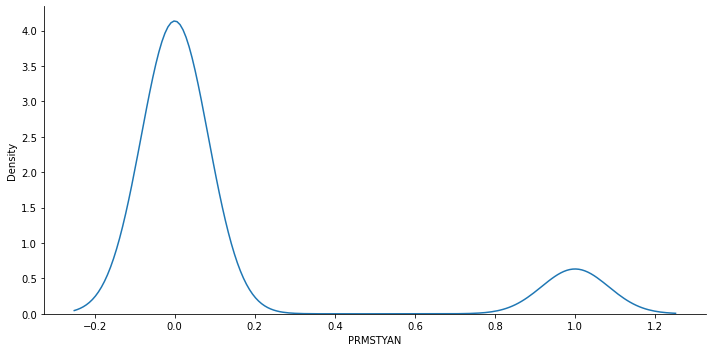

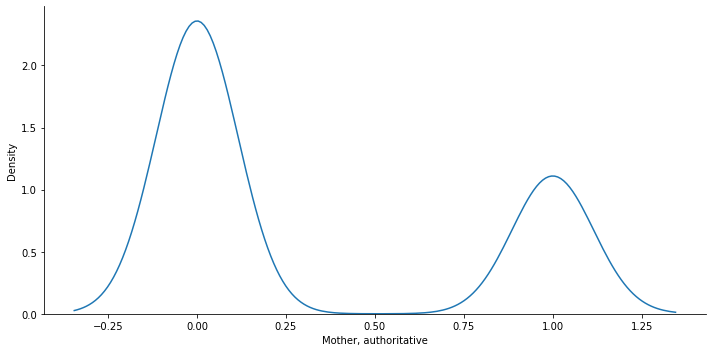

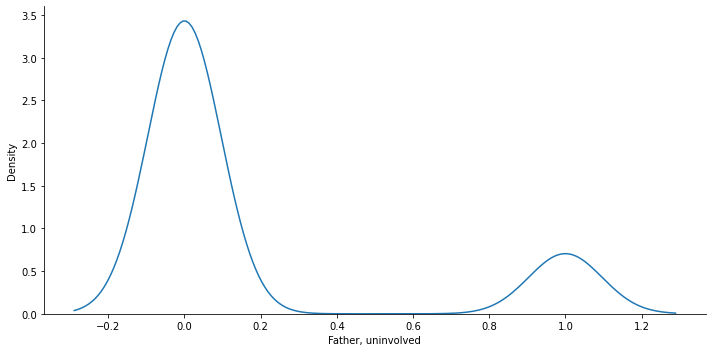

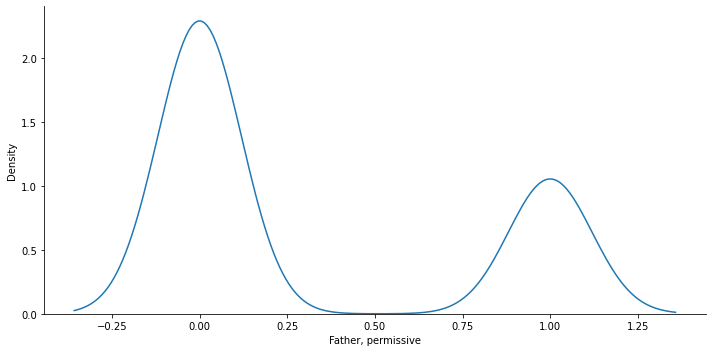

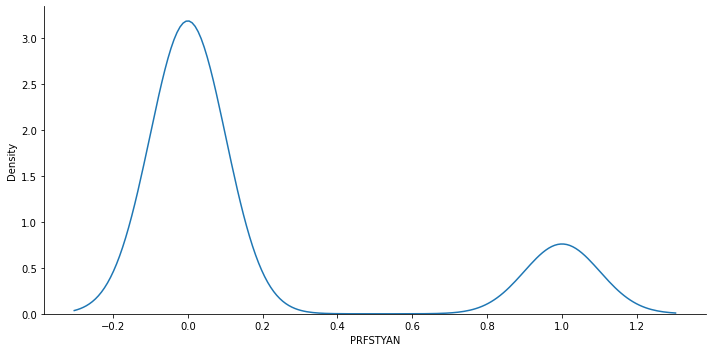

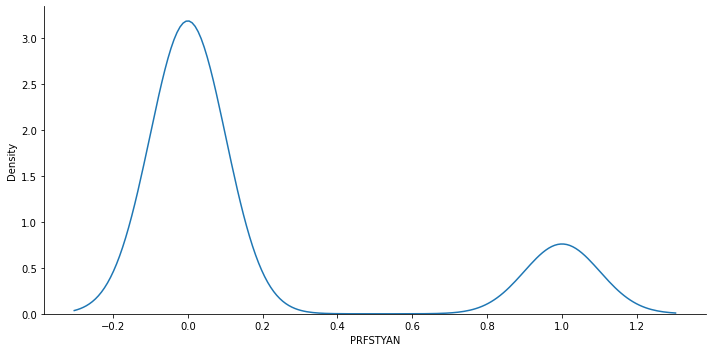

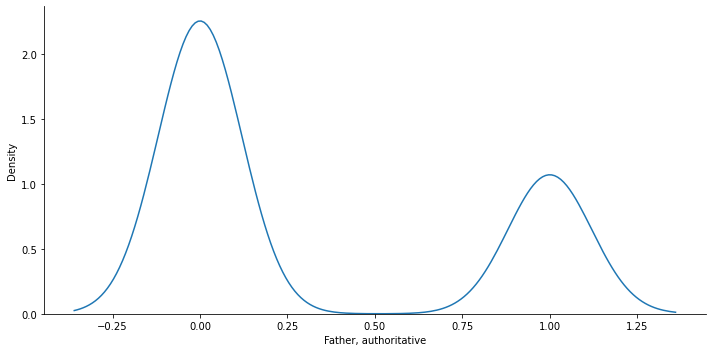

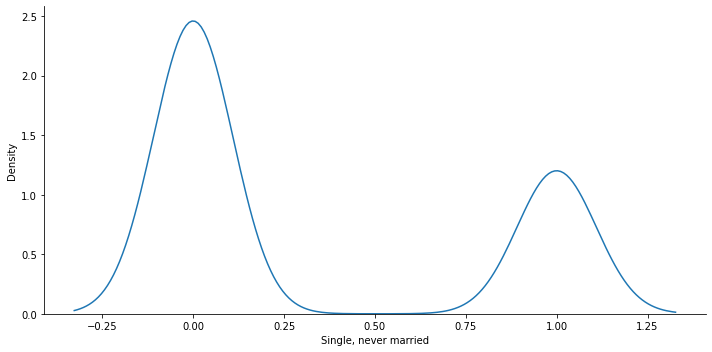

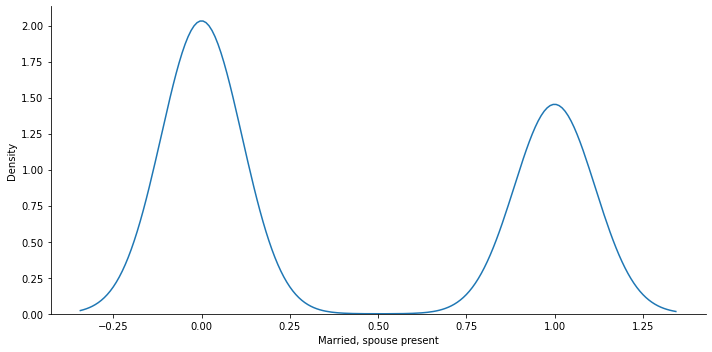

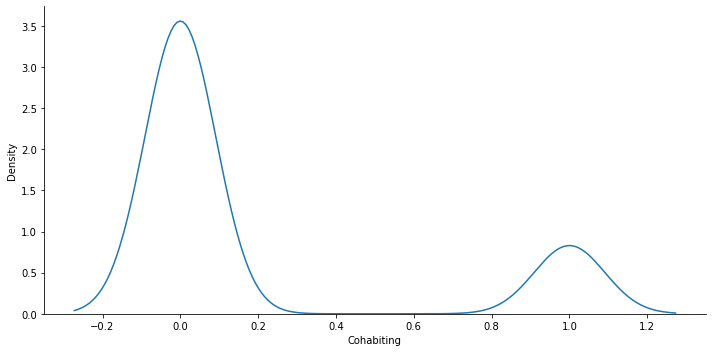

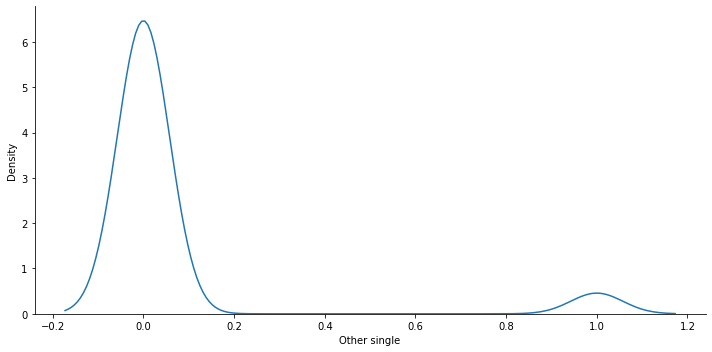

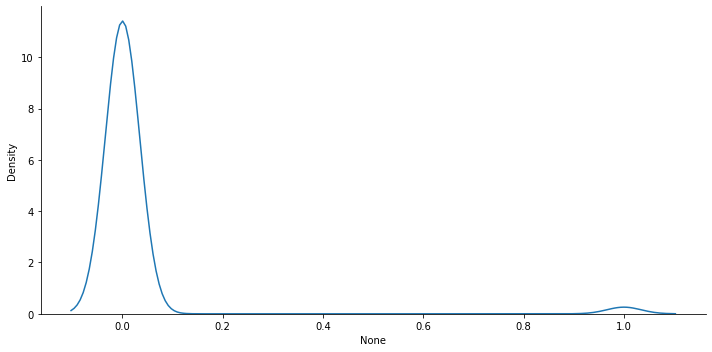

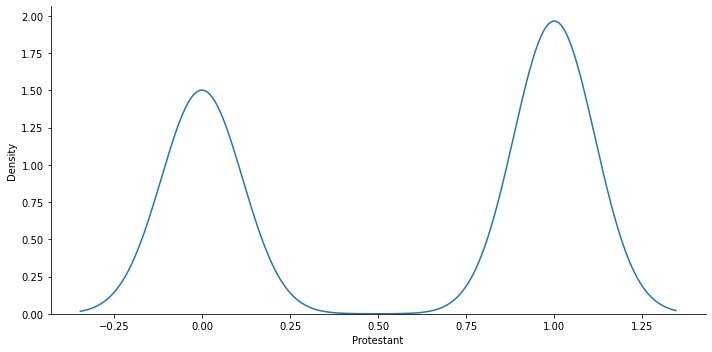

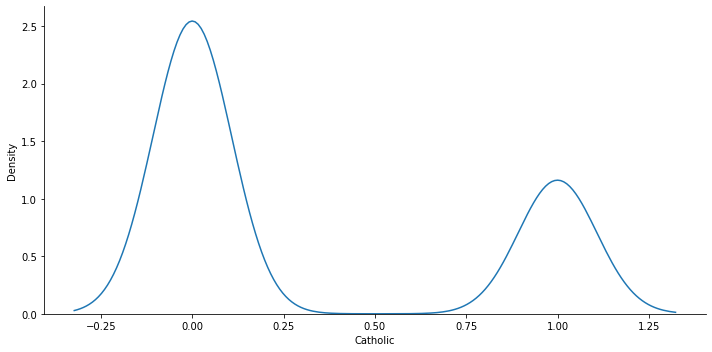

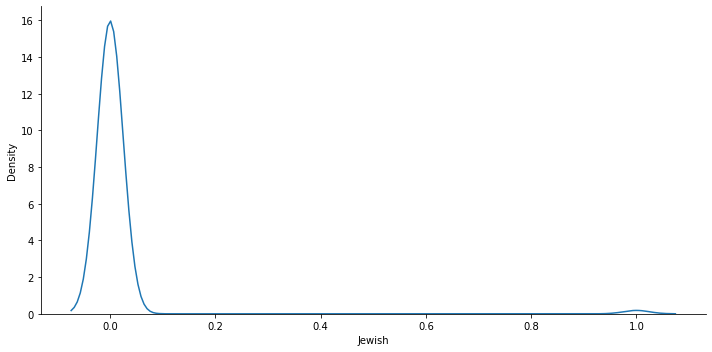

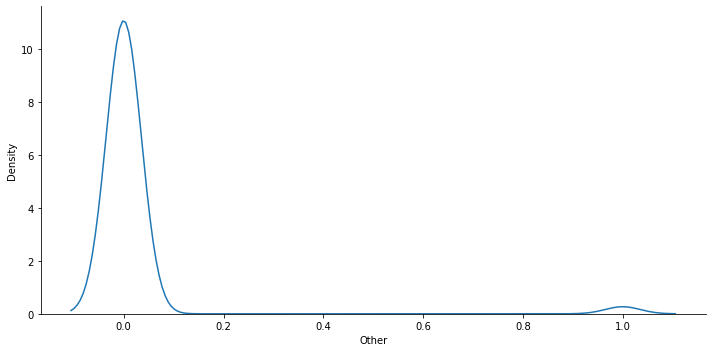

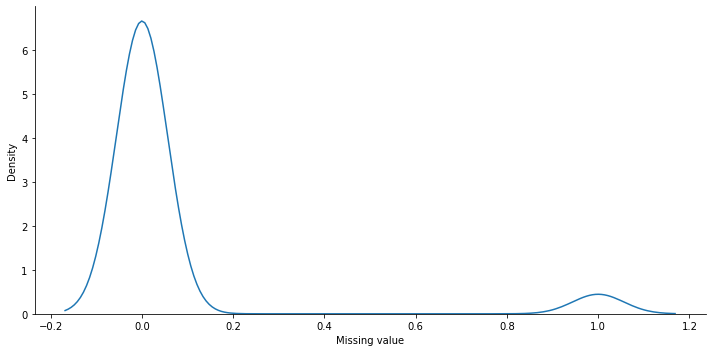

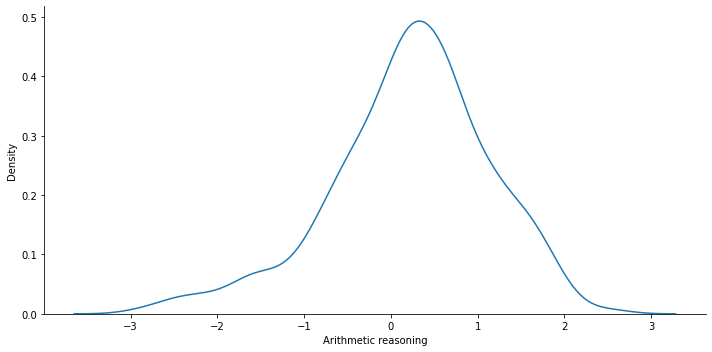

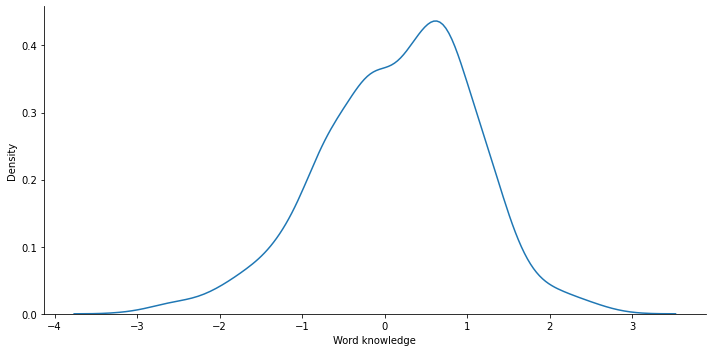

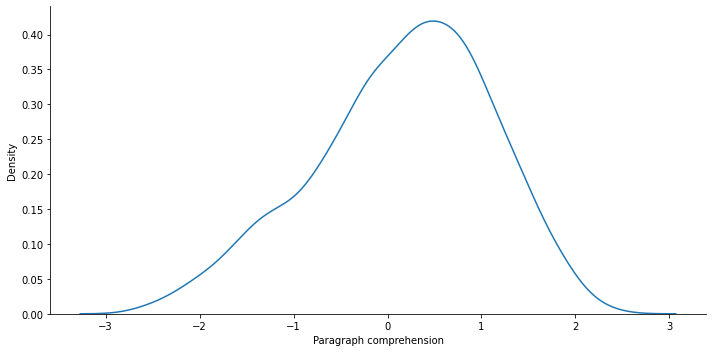

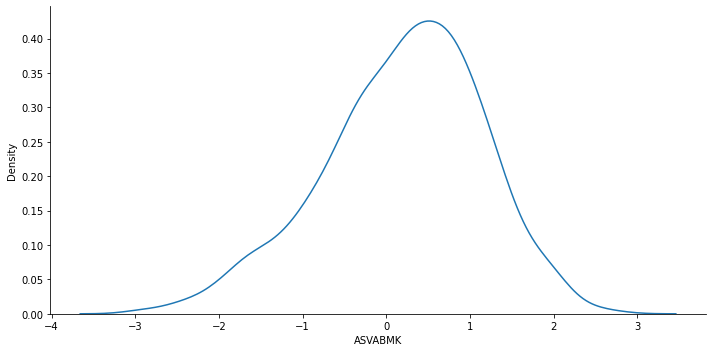

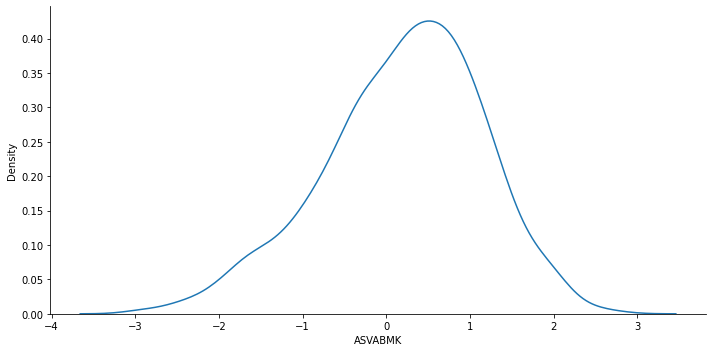

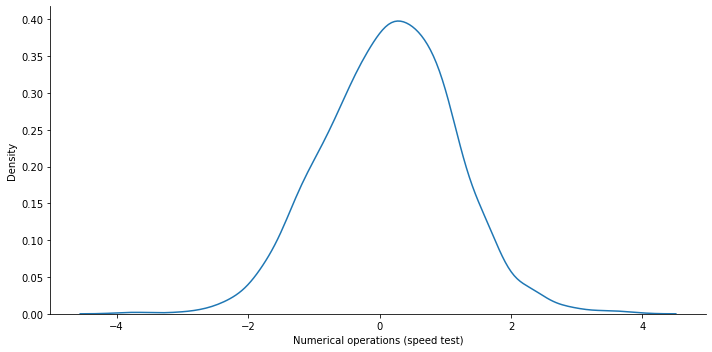

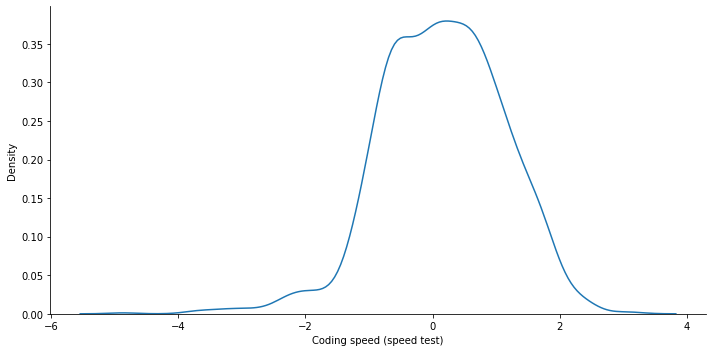

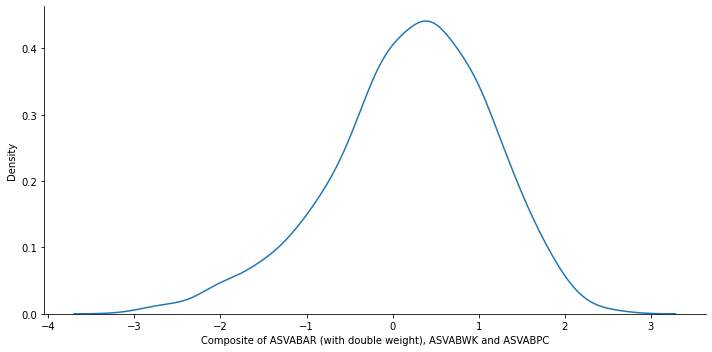

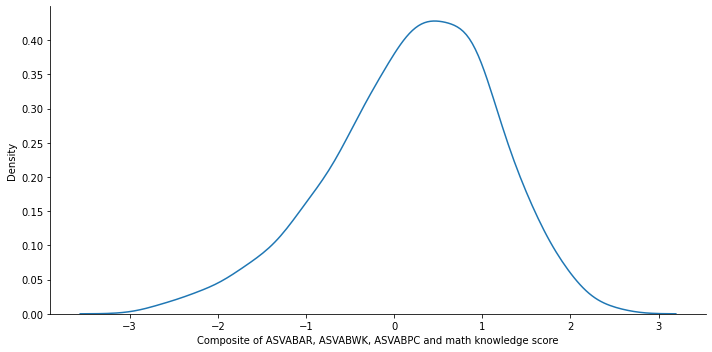

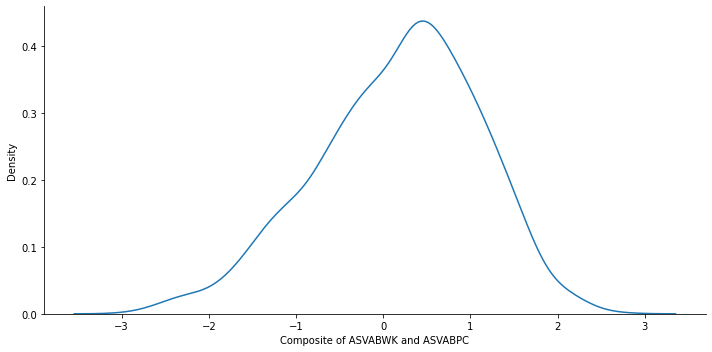

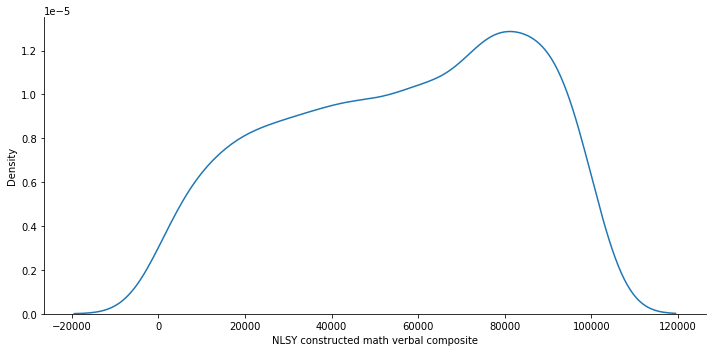

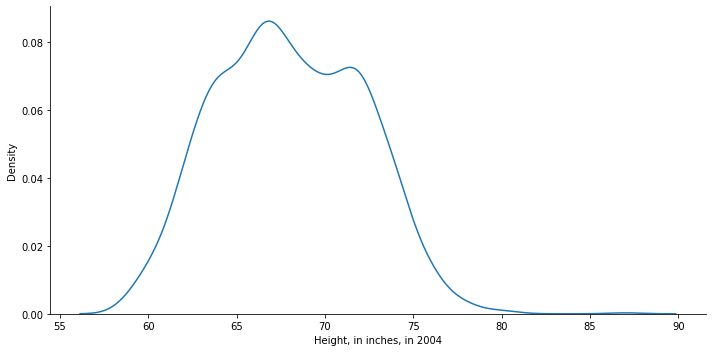

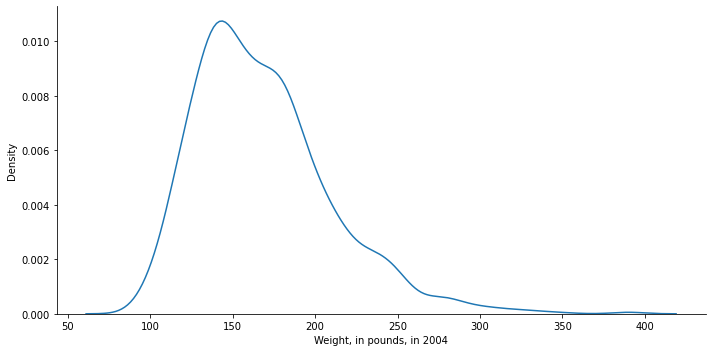

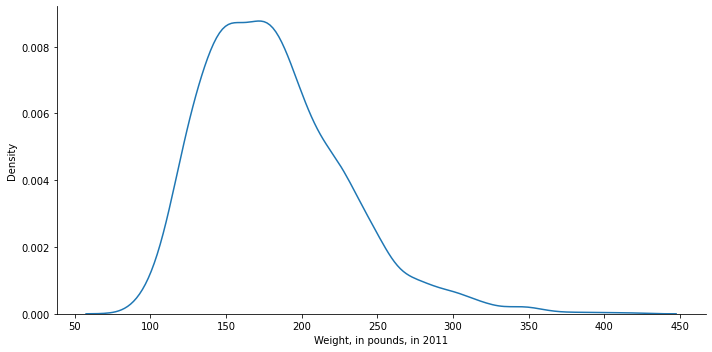

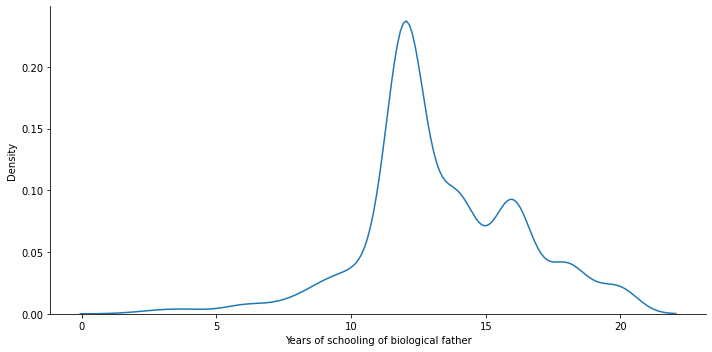

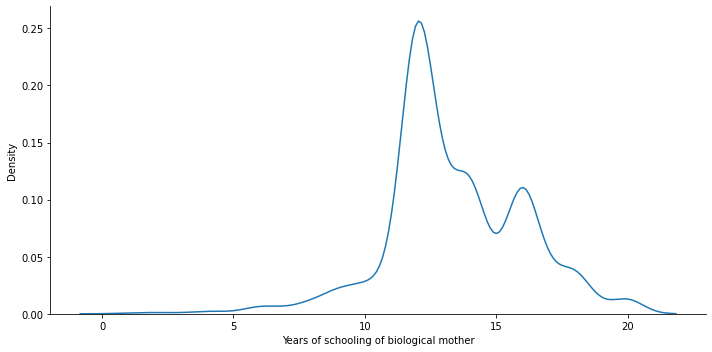

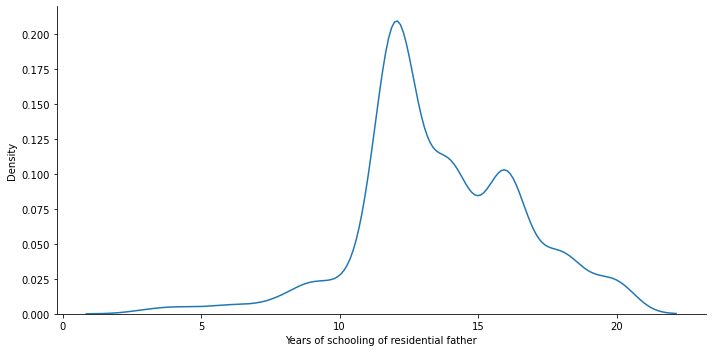

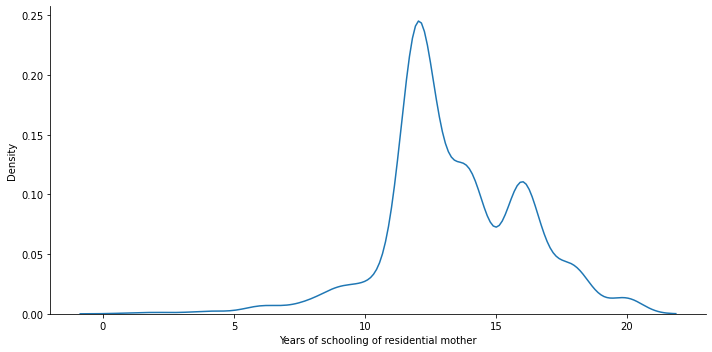

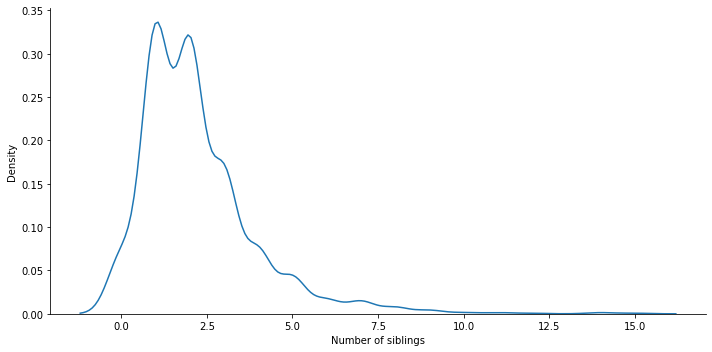

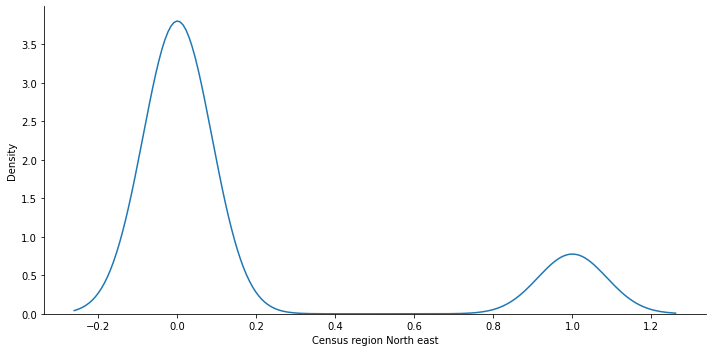

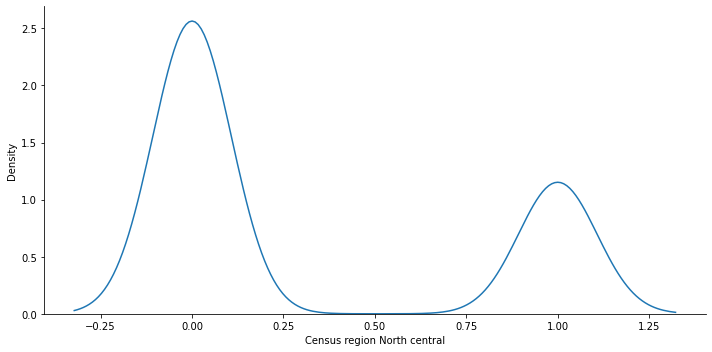

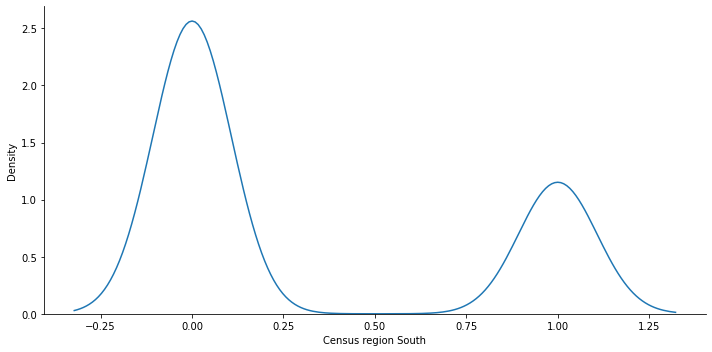

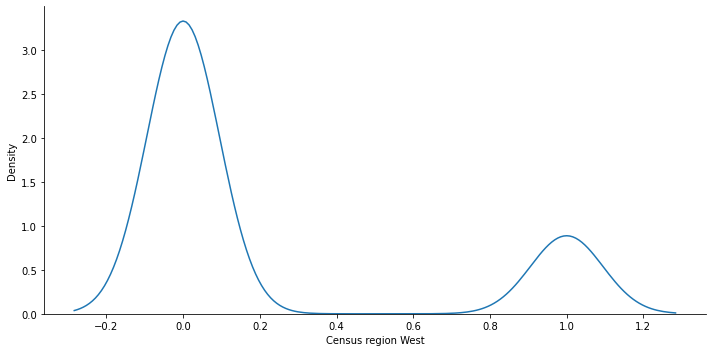

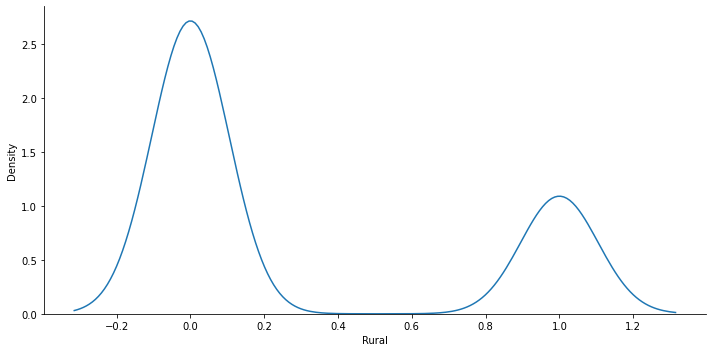

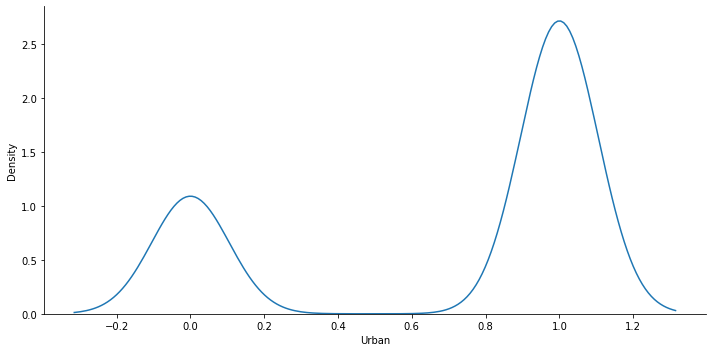

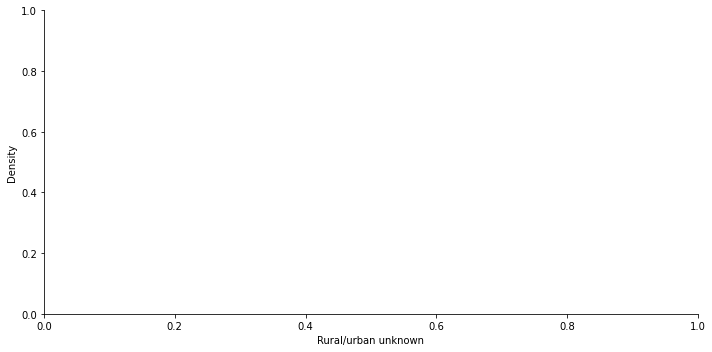

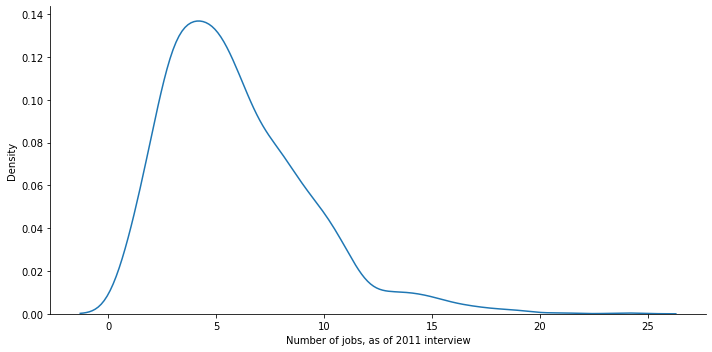

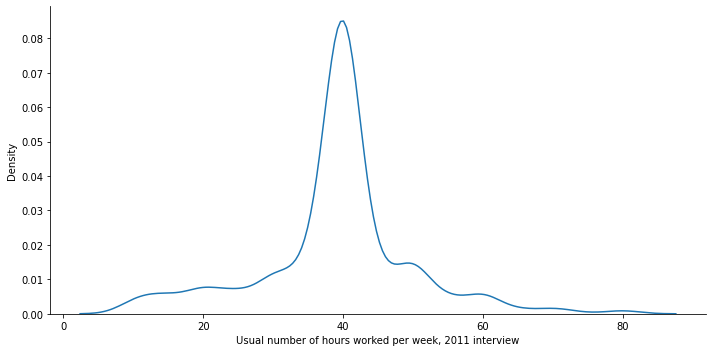

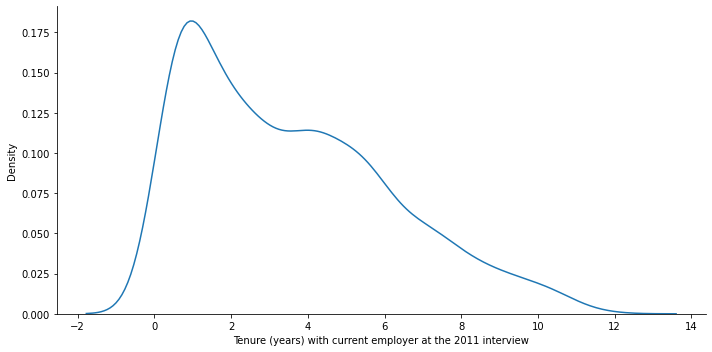

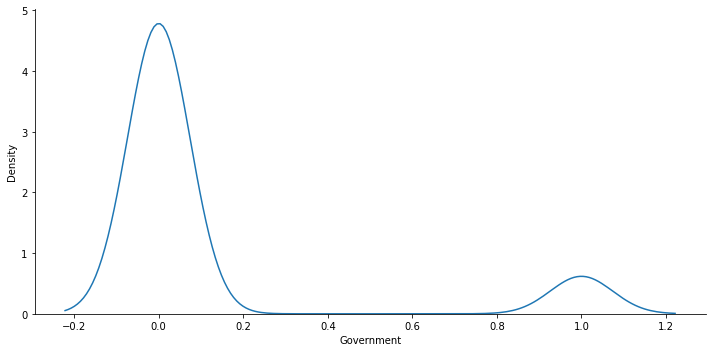

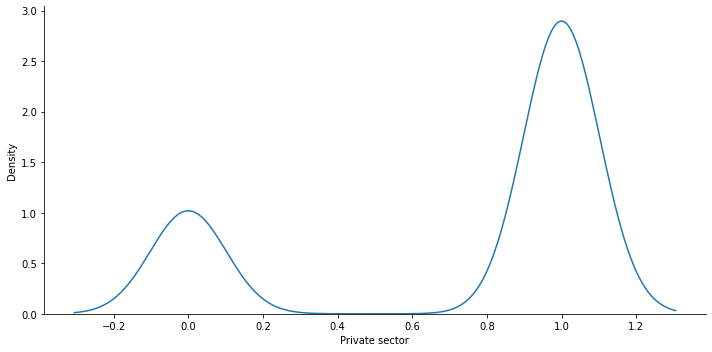

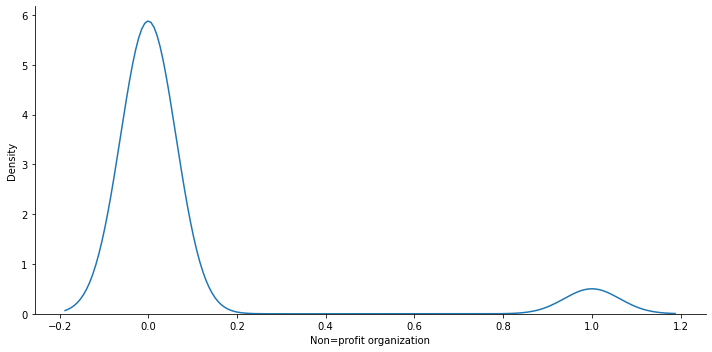

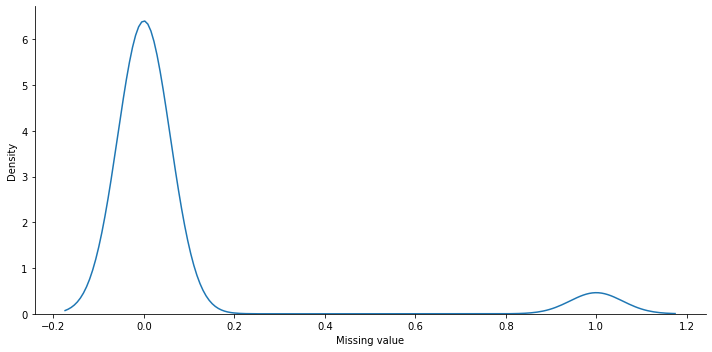

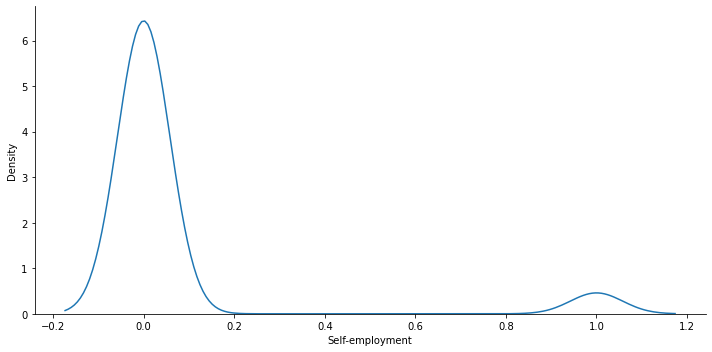

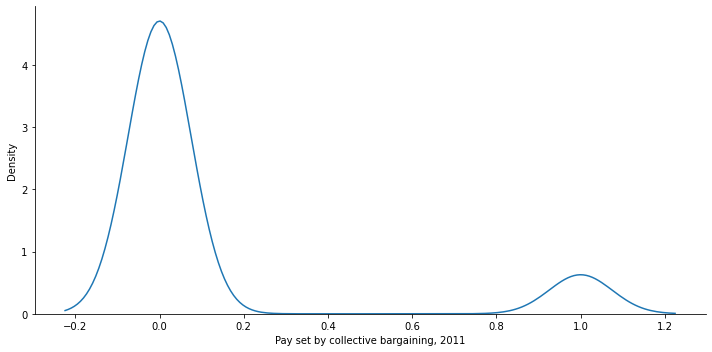

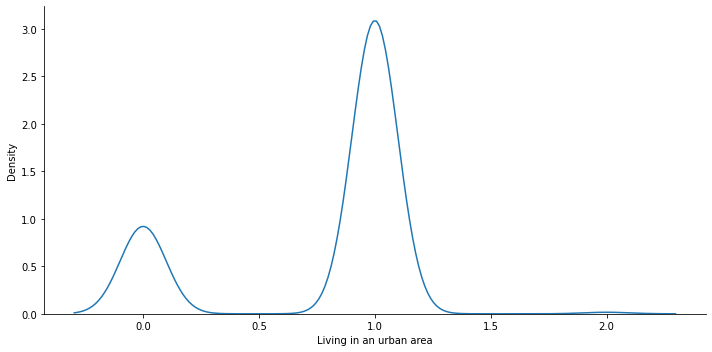

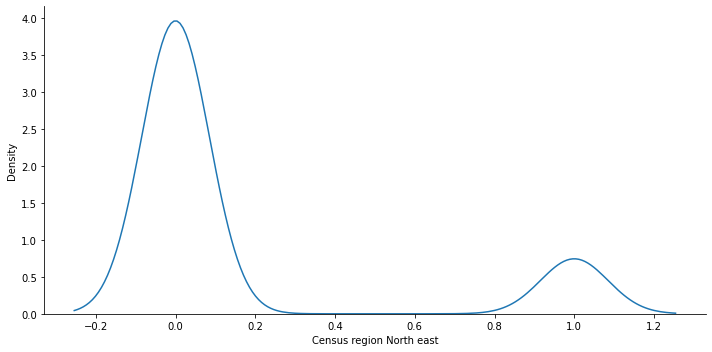

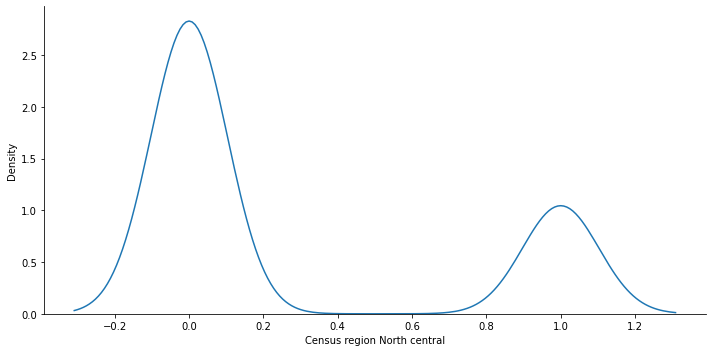

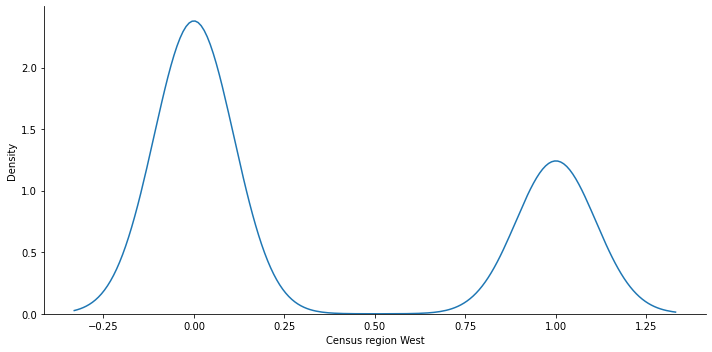

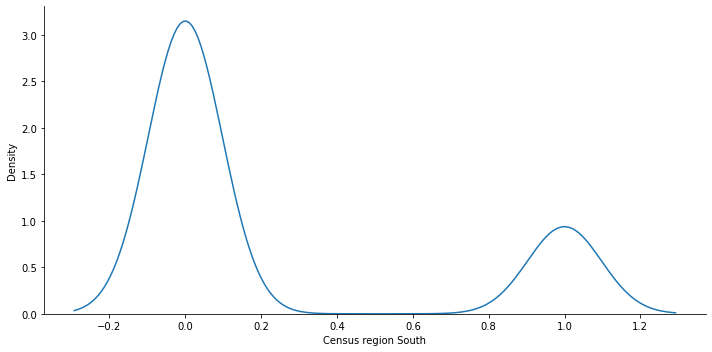

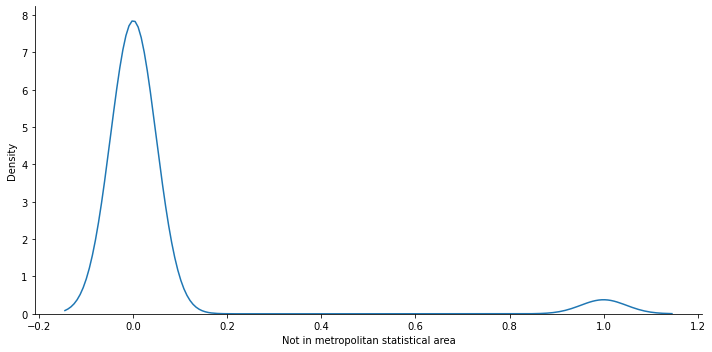

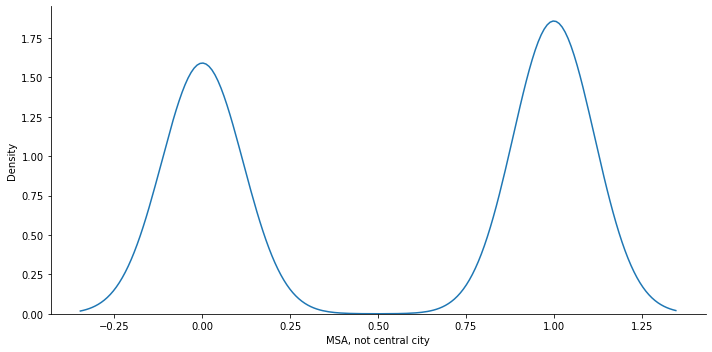

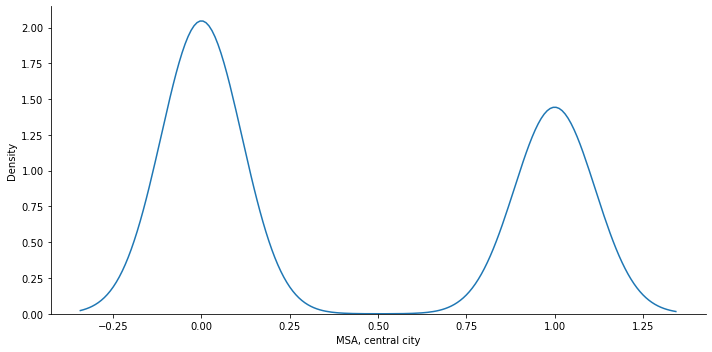

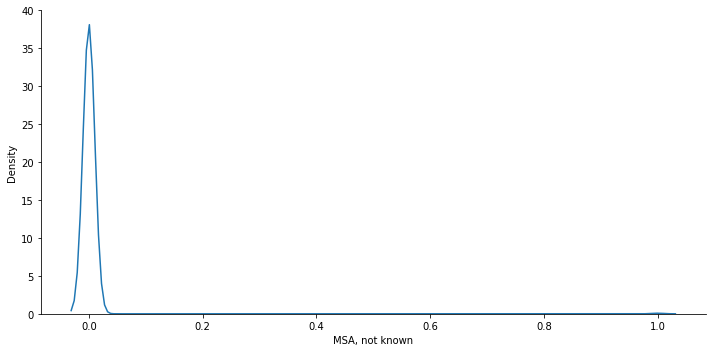

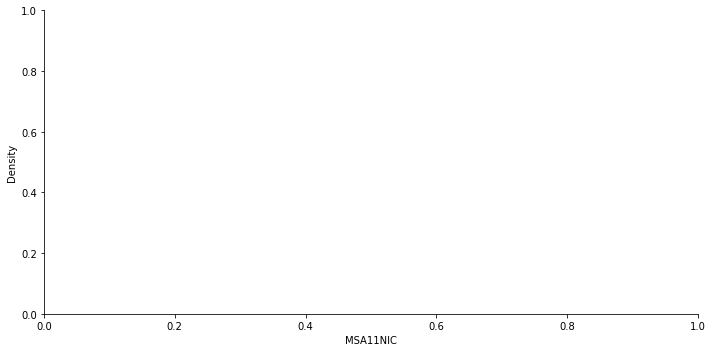

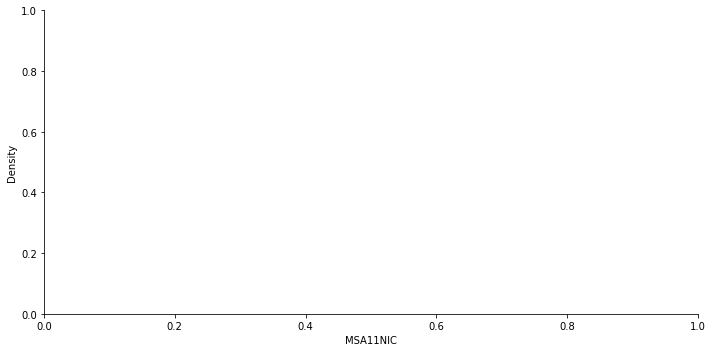

In [17]:
# Define the number of rows and columns you want
n_rows=24
n_cols=4
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

for i, column in enumerate(df_data.columns[1:]):
  try:
    sns.displot(
        data = df_data,
        x = column,
        kind = 'kde',
        # ax=axes[i//n_cols, i%n_cols],
        aspect = 2,
        warn_singular=False,
    ).set_axis_labels(data_description[data_description['Personal variables'] == column].Description.values[0])
  except IndexError:
    sns.displot(
        data = df_data,
        x = column,
        kind = 'kde',
        # ax=axes[i//n_cols, i%n_cols],
        aspect = 2,
        warn_singular=False,
    )

Comparing earnings and years of schooling

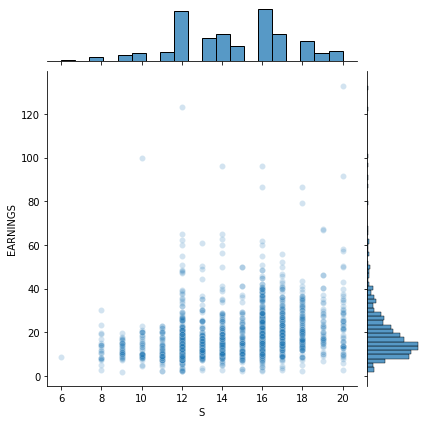

In [18]:
sns.jointplot(
    data = df_data,
    x = 'S',
    y = "EARNINGS",
    joint_kws = {'alpha': 0.2}
)

Comparing earning and work experience

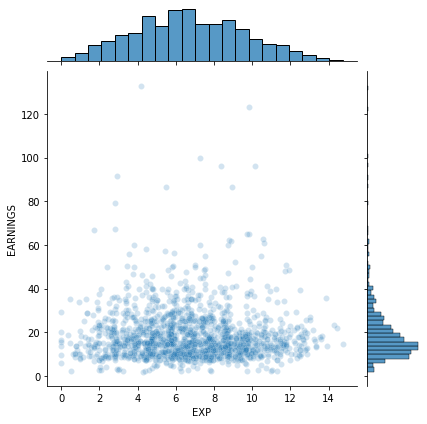

In [19]:
sns.jointplot(
    data = df_data,
    x = 'EXP',
    y = "EARNINGS",
    joint_kws = {'alpha': 0.2}
)

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [20]:
target = df_data['EARNINGS']
features = df_data.drop(['ID', 'EARNINGS'], axis=1)
features

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=10,
)

# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [21]:
regression = LinearRegression()

#Features
X = pd.DataFrame(X_train, columns=['S'])

#targer
Y = pd.DataFrame(y_train)

regression.fit(X, Y)

LinearRegression()

In [22]:
#R-squared
rsquared = regression.score(X, Y)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.081


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [23]:
regression.intercept_

array([1.02890741])

In [24]:
coef = regression.coef_[0, 0]

print(f'One can expect ${coef:.2} extra for additional year of schooling')

One can expect $1.2 extra for additional year of schooling


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [25]:
predicted_values = regression.predict(X)
residuals = (Y - predicted_values)

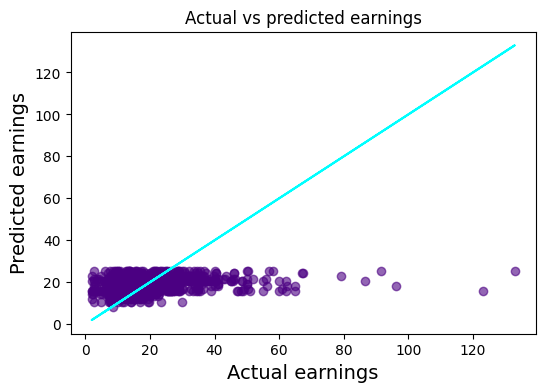

In [26]:
# original regression of Actual vs Predicted Earnings
plt.figure(dpi=100)
plt.scatter(
    x=Y,
    y=predicted_values,
    c='indigo',
    alpha=0.6
)

plt.plot(
    Y,
    Y,
    color='cyan'
)

plt.title('Actual vs predicted earnings')

plt.xlabel('Actual earnings', fontsize=14)
plt.ylabel('Predicted earnings', fontsize=14)
plt.show()

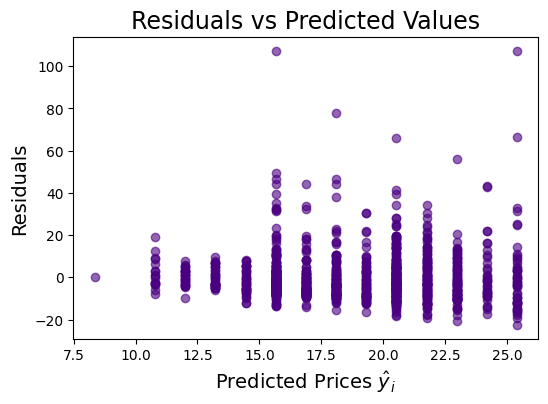

In [27]:
# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [28]:
regression_mult = LinearRegression()

#Features
X_mult = pd.DataFrame(X_train, columns=['S', "EXP"])

regression_mult.fit(X_mult, Y)

LinearRegression()

In [29]:
rsquared_mult = regression_mult.score(X_mult, y_train)

print(f'Training data r-squared: {rsquared_mult:.2}')

Training data r-squared: 0.12


### Evaluate the Coefficients of the Model

In [30]:
regression_mult.coef_

array([[1.79422175, 0.97900689]])

In [31]:
multi_coef = pd.DataFrame(
    data=regression_mult.coef_.transpose(), 
    index = X_mult.columns, 
    columns=['Coefficient'])
multi_coef

,Coefficient
S,1.79
EXP,0.98


### Analyse the Estimated Values & Regression Residuals

In [33]:
predicted_vals_mult = regression_mult.predict(X_mult)
residuals_mult = (Y - predicted_vals_mult)

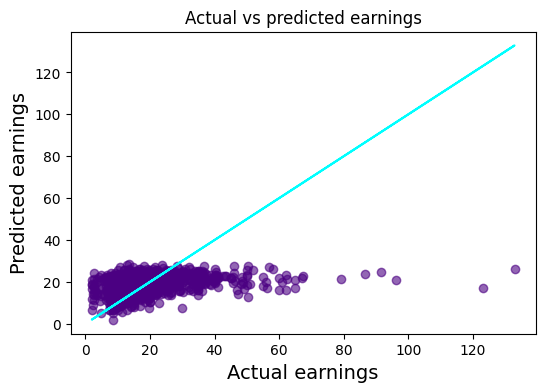

In [34]:
# original regression of Actual vs Predicted Earnings
plt.figure(dpi=100)
plt.scatter(
    x=Y,
    y=predicted_vals_mult,
    c='indigo',
    alpha=0.6
)

plt.plot(
    Y,
    Y,
    color='cyan'
)

plt.title('Actual vs predicted earnings')

plt.xlabel('Actual earnings', fontsize=14)
plt.ylabel('Predicted earnings', fontsize=14)
plt.show()

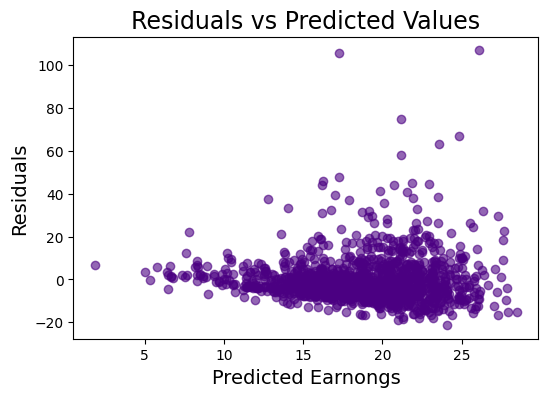

In [35]:
# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals_mult, y=residuals_mult, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnongs', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

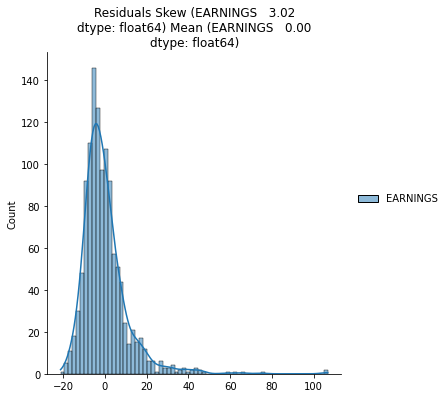

In [36]:
# Residual Distribution Chart
resid_mean = round(residuals_mult.mean(), 2)
resid_skew = round(residuals_mult.skew(), 2)

sns.displot(residuals_mult, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [37]:
to_test = {'S':[16],'EXP':[5]}


# d = {'col1': [1, 2], 'col2': [3, 4]}
# df = pd.DataFrame(data=d)
# df
#    col1  col2

test_data = pd.DataFrame(data=to_test)
test_data

,S,EXP
0,16,5


In [38]:
prediction = regression_mult.predict(test_data)[0, 0]
print(f'A person with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn ${prediction:.3}')

A person with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn $19.7


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

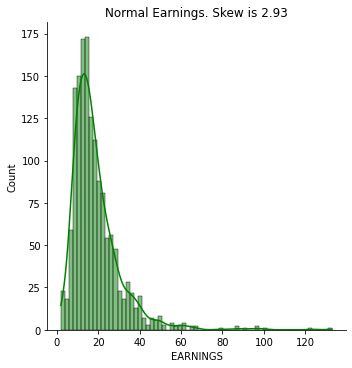

In [39]:
tgt_skew = df_data['EARNINGS'].skew()
sns.displot(df_data['EARNINGS'], kde='kde', color='green')
plt.title(f'Normal Earnings. Skew is {tgt_skew:.3}')
plt.show()

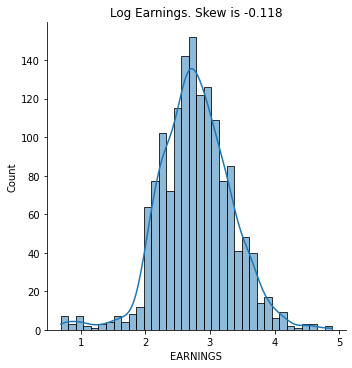

In [40]:
y_log = np.log(df_data['EARNINGS'])
sns.displot(y_log, kde=True)
plt.title(f'Log Earnings. Skew is {y_log.skew():.3}')
plt.show()

In [47]:
new_target = np.log(df_data['EARNINGS']) # Use log prices
features = df_data.drop(['ID', 'EARNINGS'], axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()

X_mult_log = pd.DataFrame(X_train, columns=['S', "EXP", 'FEMALE',	'MALE'])



log_regr.fit(X_mult_log, log_y_train)
log_rsquared = log_regr.score(X_mult_log, log_y_train)

log_predictions = log_regr.predict(X_mult_log)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.19


In [51]:
to_test_m = {'S':[16],'EXP':[5], 'FEMALE':[0],	'MALE':[1]}
to_test_f = {'S':[16],'EXP':[5], 'FEMALE':[1],	'MALE':[0]}


test_data_m = pd.DataFrame(data=to_test_m)
test_data_f = pd.DataFrame(data=to_test_f)
test_data_m
prediction_m = log_regr.predict(test_data_m)[0]
prediction_f = log_regr.predict(test_data_f)[0]

print(f'A male with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn ${np.exp(prediction_m):.3}')
print(f'A female with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn ${np.exp(prediction_f):.3}')

A male with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn $18.8
A female with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn $15.2
